In [49]:
#Import Libraries
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
# Load CSV
data = pd.read_csv("cricket_tweets.csv", encoding='utf-8')

print(data.head())

                    id      user_name  user_location  \
0  1433440359477096453  Cricket World         Global   
1  1433438874995343361        Ⓜ️ithun    मुंबई, भारत   
2  1433436646645501956     Akram Khan            NaN   
3  1433433904438931474           Mr.P  Mumbai, India   
4  1433433383024005131   Cricket_Kith            NaN   

                                    user_description         user_created  \
0  Official Twitter account of Cricket World - ne...  2009-01-23 10:49:02   
1      Cricket 🏏\nPhotography📷 \nWildlife🐅 \nNature🌳  2010-01-09 15:38:06   
2       BLOGGER | ＣＲＩＣＫＥＴ ＬＯＶＥＲ | Fond of full forms  2014-07-08 00:39:28   
3                                            nothing  2013-08-25 10:07:10   
4  Crick, Crick, Cricket🏏\nDon't Throw Your Wicke...  2021-09-01 11:39:18   

   user_followers  user_friends  user_favourites  user_verified  \
0           58699          9834            90829           True   
1               7            97              343          False   

In [52]:
# Perform Sentiment Analysis using TextBlob
def get_sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return 0

data['polarity'] = data['text'].apply(get_sentiment)

In [54]:
#  Categorize Sentiment (Positive / Negative / Neutral)
def categorize(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'
_
data['sentiment'] = data['polarity'].apply(categorize)



Sentiment Counts:
sentiment
Neutral     29272
Positive    25666
Negative     5924
Name: count, dtype: int64


C:\Users\Kishan Jaiswal\AppData\Local\Temp\ipykernel_25064\3825440636.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='Set2')


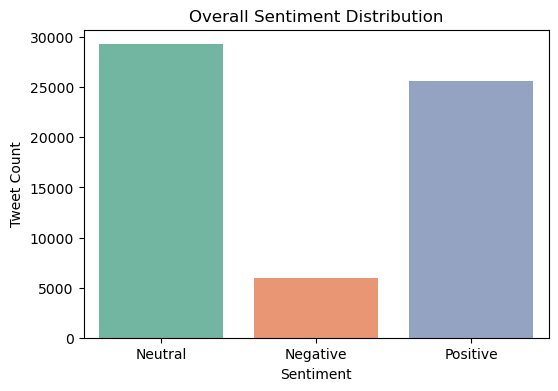

In [55]:
# Display Sentiment Counts
print("\nSentiment Counts:")
print(data['sentiment'].value_counts())

#  Visualization — Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=data, palette='Set2')
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

In [56]:
# Train-Test Split + Model Training + Accuracy

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)


✅ Model Accuracy: 85.86%

📋 Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.52      0.64      1199
     Neutral       0.83      0.95      0.88      5809
    Positive       0.91      0.83      0.87      5165

    accuracy                           0.86     12173
   macro avg       0.86      0.77      0.80     12173
weighted avg       0.86      0.86      0.85     12173



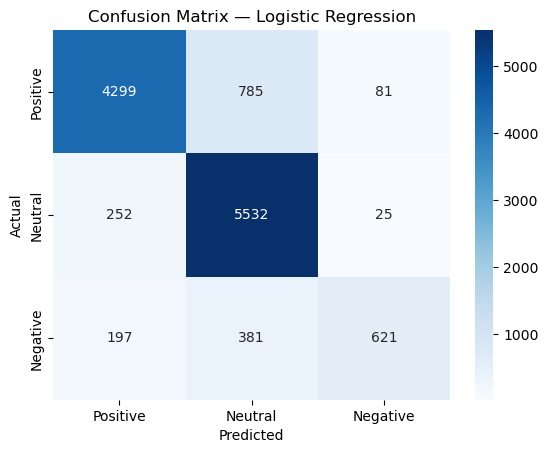

In [57]:
#  Accuracy, Confusion Matrix, and Report

acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {acc*100:.2f}%")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred, labels=['Positive','Neutral','Negative'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive','Neutral','Negative'],
            yticklabels=['Positive','Neutral','Negative'])
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

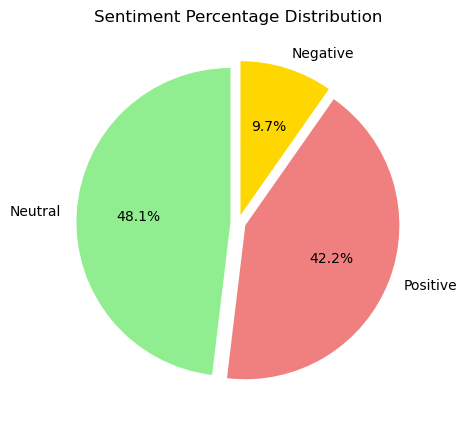

In [58]:
# Pie Chart for Sentiment Percentage
plt.figure(figsize=(5,5))
data['sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'lightcoral', 'gold'],
    explode=(0.05, 0.05, 0.05)
)
plt.title("Sentiment Percentage Distribution")
plt.ylabel("")
plt.show()


C:\Users\Kishan Jaiswal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kishan Jaiswal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127880 (\N{BALLOON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kishan Jaiswal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kishan Jaiswal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Kishan Jaiswal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


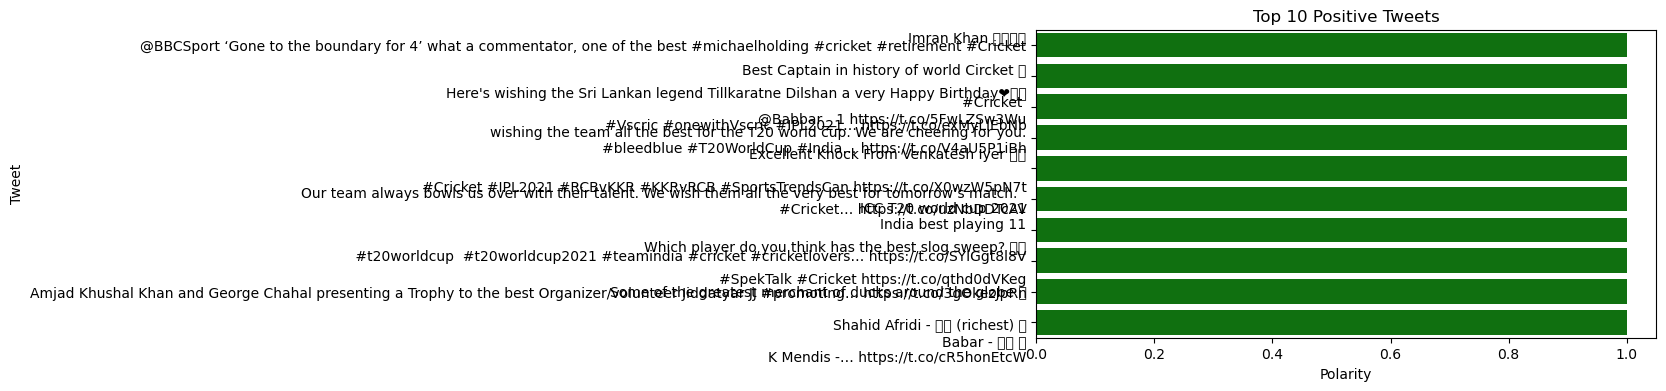

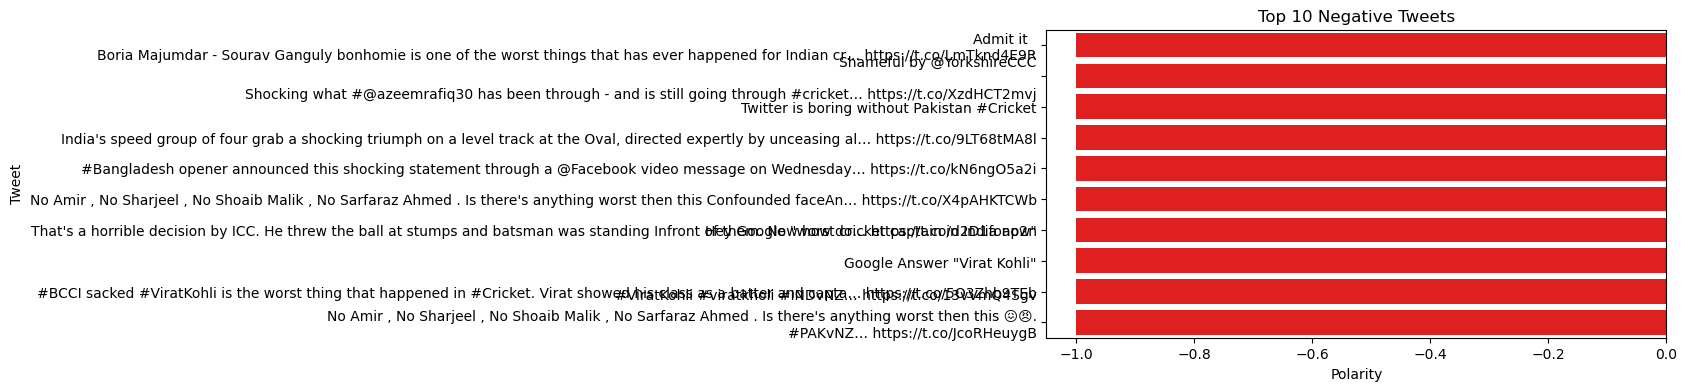

In [59]:
# Top Positive & Negative Tweets
top_pos = data.sort_values(by='polarity', ascending=False).head(10)
top_neg = data.sort_values(by='polarity', ascending=True).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x='polarity', y='text', data=top_pos, color='green')
plt.title("Top 10 Positive Tweets")
plt.xlabel("Polarity")
plt.ylabel("Tweet")
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x='polarity', y='text', data=top_neg, color='red')
plt.title("Top 10 Negative Tweets")
plt.xlabel("Polarity")
plt.ylabel("Tweet")
plt.show()


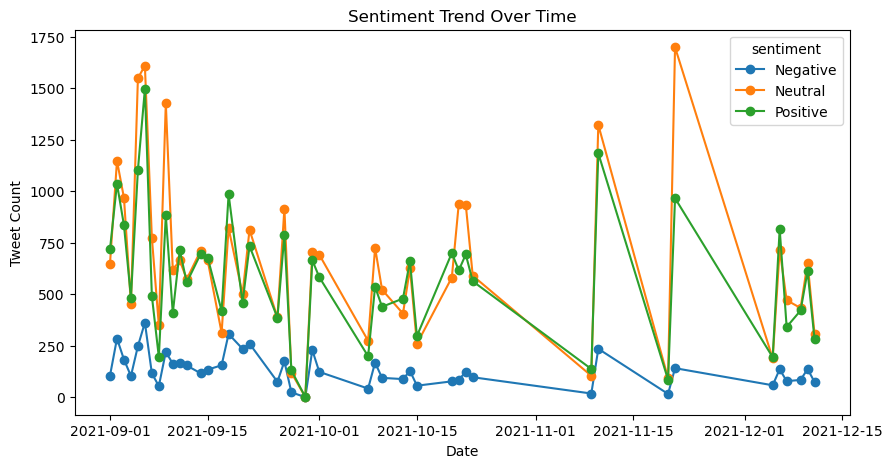

In [60]:
# Sentiment Trend Over Time (if you have a 'date' column)
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')
    trend = data.groupby([data['date'].dt.date, 'sentiment']).size().unstack(fill_value=0)
    trend.plot(kind='line', figsize=(10,5), marker='o')
    plt.title("Sentiment Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Tweet Count")
    plt.show()

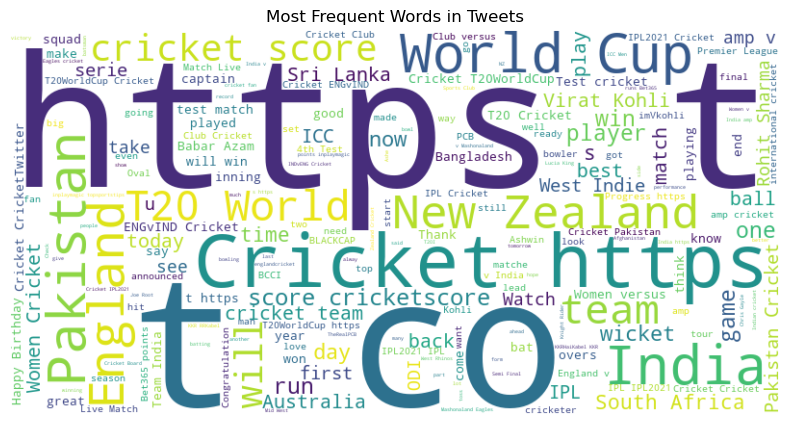

In [61]:
from wordcloud import WordCloud

# Word Cloud of All Tweets
text_all = " ".join(str(t) for t in data['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Tweets")
plt.show()


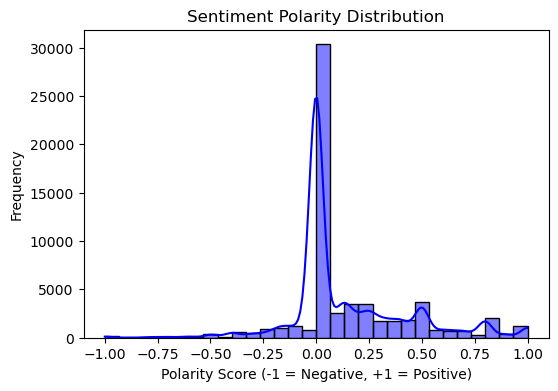

In [71]:
# visualize polarity vs frequency

plt.figure(figsize=(6,4))
sns.histplot(data['polarity'], bins=30, kde=True, color='blue')
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity Score (-1 = Negative, +1 = Positive)")
plt.ylabel("Frequency")
plt.show()